# Ejercicio de Regresión Logística en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizarán durante el Ejercicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb

%matplotlib inline

### Carga del archivo csv (datos de entrada)

EL archivo csv (por simplicidad, se considera que estará en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable dataframe. Al utlizar el método dataframe.head() se visualiza en pantalla los 5 registros.

In [2]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos

Se realiza una visualización para conocer a los atributos característicos de la información que se trabaja y su correlación.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como: "duración", "páginas", "acciones" y "valor". Se puede apreciar gráficamente entre qué valores se comprenden sus minímos y en qué intervalos se concentra la mayor densidad de registros.

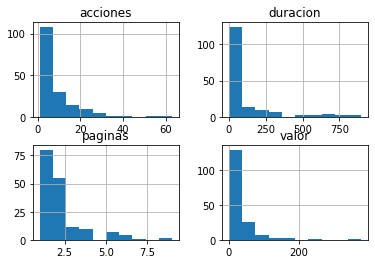

In [5]:
dataframe.drop(['clase'], 1).hist()
plt.show()

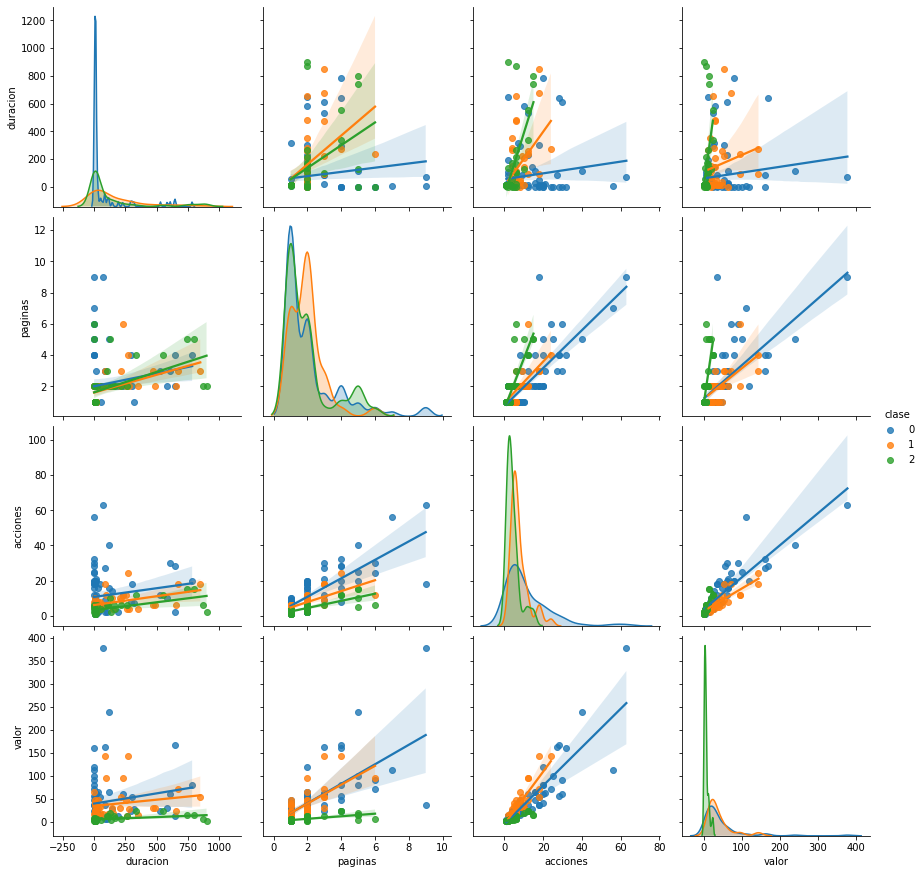

In [6]:
sb.pairplot(dataframe.dropna(), hue = 'clase', height = 3, vars = ["duracion", "paginas", "acciones", "valor"], kind = 'reg')

### Se establece el modelo R Log

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna "clase" con el método drop(). La columna "clase" se agrega al atributo y se ejecuta X.shape para comprobar la dimensión de la matriz de entrada de 170 registros por 4 columnas.

In [7]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunto de entradas X y salidas ‘y’.

In [11]:
model = linear_model.LogisticRegression()
model.fit(X,y)

NameError: name 'linear_model' is not defined

Una vez compilado el modelo, se clasifica todo el conjunto de entradas X utilizando el método “predict(X)”. Si se revisan algunas de sus salidas se puede ver como coincide con las salidas reales del archivo csv.

In [9]:
predictions = model.predict(X)
print(predictions[0:5])

NameError: name 'model' is not defined

Y se confirma el desempeño del modelo utilizando model.score() el cuál devuelve la precisión media de las predicciones, para este caso del 77%.

In [12]:
model.score(X,y)

NameError: name 'model' is not defined

### Adicional: Validación del Modelo

Una buena práctica en Machine Learning es la de subdividir el conjunto de datos de entrada en un conjunto de entrenamiento y uno mas para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que el algoritmo pueda fallar por “sobregeneralizar” el conocimiento.

Para ello, se subdividen los datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para validación.

Se compila nuevamente el modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y se calcula el nuevo desempeño que ahora registra 74%.

In [14]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

NameError: name 'model_selection' is not defined

Se realizan las predicciones---clasificación---utilizando “cross validation set” el conjunto reservado para validación. En este caso se aprecia que los aciertos fueron del 85% sin olvidar tener en cuenta que el tamaño de datos es pequeño.

In [15]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

NameError: name 'model' is not defined

# Reporte de Resultados del Modelo RLog

Finalmente se obtiene la “matriz de confusión” la cuál muestra cuántos resultados equivocados tuvo de cada clase (los que no están en la diagonal); por ejemplo, predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

In [16]:
print(confusion_matrix(Y_validation, predictions))

NameError: name 'confusion_matrix' is not defined

In [17]:
print(classification_report(Y_validation, predictions))

NameError: name 'classification_report' is not defined

Se obtiene el reporte de clasificación del conjunto de Validación. En este caso (de un total de 34 registros) se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux. Se aprecia la precisión con que se acertaron cada una de las clases que, por ejemplo, Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). Conviene tener en cuenta que F1-score ofrece una valoración que toma en cuenta la precisión y recall. El promedio de F1-score es de 84% lo cual no está nada mal.

# Clasificación (o predicción) de nuevos registros

Como último ejercicio, se proporcionan datos de entrada de navegación de un usuario sintéticos y que tiene estos valores:

Tiempo Duración: 10 Paginas visitadas: 3 Acciones al navegar: 5 Valoración: 9 Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [18]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

NameError: name 'model' is not defined

Como un extra del ejercicio habrá que jugar y variar estos valores para obtener usuarios de tipo Windows o Macintosh.En este ejercicio se probó un modelo de Regresión Logística en Python para la clasificación del uso del Sistema Operativo por parte de usuarios y a partir de sus características de navegación en un sitio web. De este ejercicio, se podrá extender a otro tipos de tareas que pueden surgir durante un trabajo en el que se debe clasificar resultados en valores discretos. Recordar que si se tuvieran que predecir valores continuos, se debera aplicar Regresión Lineal. Recuerde descargar los archivos para realizar el Ejercicio: Archivo de Entrada csv (su nombre es usuarios win-mac-lin.csv) Notebook Jupyter Python (clic derecho y “descargar archivo como…”); o bien, se puede ver online en Jupyter Notebook Viewer. Recordatorio: Si se interesa en aprender algoritmos con Python, existen muchos mas que están disponibles gratuitos por toda la web en una infinidad de idiomas.